### This project is to track EFT prices.

It uses API data from https://tarkov.dev/api/

### Import

In [2]:

import pandas as pd
import helper_functions

from openpyxl import load_workbook
from tqdm.notebook import tqdm

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### All item info

In [3]:
all_item_info = helper_functions.get_all_item_info()
all_item_info = all_item_info["data"]["items"]

In [4]:
all_item_info_restruct = [helper_functions.restructure_sales_outer(x) for x in all_item_info]
all_item_info_df = pd.DataFrame(all_item_info_restruct)
all_item_info_df['category'] = all_item_info_df['category'].apply(lambda x: x["name"])
all_item_info_df.head(5)

,id,name,normalizedName,shortName,width,height,avg24hPrice,lastLowPrice,changeLast48h,low24hPrice,high24hPrice,lastOfferCount,changeLast48hPercent,category,bartersFor,bartersUsing,buy_mechanic,buy_fleaMarket,sell_prapor,sell_fence,sell_skier,sell_peacekeeper,sell_mechanic,sell_ref,sell_fleaMarket,sell_therapist,buy_prapor,buy_peacekeeper,buy_therapist,sell_jaeger,sell_ragman,buy_ragman,buy_jaeger,buy_skier
0,5447a9cd4bdc2dbd208b4567,Штурмовая винтовка Colt M4A1 5.56x45,colt-m4a1-556x45-assault-rifle,M4A1,1,1,73874.0,68000.0,-14778.0,51111.0,120000.0,22.0,-16.67,Штурм. винтовка,[],[],18397.0,73874.0,9198.0,7358.0,9014.0,8278.0,10302.0,9198.0,68000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5447ac644bdc2d6c208b4567,Пачка патронов 5.56x45мм M855 (50 штук),556x45mm-m855-ammo-pack-50-pcs,M855,1,1,NaN,NaN,0.0,NaN,NaN,2.0,0.00,Коробка с боеприпасами,[],[],NaN,NaN,NaN,400.0,NaN,NaN,560.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5448ba0b4bdc2d02308b456c,Ключ от выхода с Завода,factory-emergency-exit-key,Завод,1,1,147893.0,188888.0,-23152.0,50000.0,300000.0,18.0,-13.54,Механический ключ,[{'id': '670917c5d30071a41703ca90b'}],[{'id': '670917c5d30071a41703ca90b'}],NaN,147893.0,25555.0,20444.0,NaN,NaN,NaN,NaN,188888.0,32199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5448bd6b4bdc2dfc2f8b4569,Пистолет Макарова ПМ 9x18ПМ,makarov-pm-9x18pm-pistol,ПМ,2,1,11768.0,8000.0,-1753.0,5000.0,55000.0,3.0,-12.96,Пистолет,[],[],NaN,11768.0,2048.0,1638.0,2007.0,1843.0,2294.0,2048.0,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5448be9a4bdc2dfd2f8b456a,Ручная граната РГД-5,rgd-5-hand-grenade,РГД-5,1,1,17737.0,15499.0,-1.0,12000.0,25000.0,18.0,-0.01,Метательное оружие,[{'id': '66e80301dfa590986a081cf31'}],[],NaN,17737.0,3615.0,2892.0,3542.0,NaN,NaN,NaN,15499.0,NaN,11822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
all_item_info_df = all_item_info_df.groupby(['category'], group_keys=False).apply(lambda x: x.sort_values('changeLast48hPercent', ascending=False))

In [7]:
all_item_info_df.head(10)

,id,name,normalizedName,shortName,width,height,avg24hPrice,lastLowPrice,changeLast48h,low24hPrice,high24hPrice,lastOfferCount,changeLast48hPercent,category,bartersFor,bartersUsing,buy_mechanic,buy_fleaMarket,sell_prapor,sell_fence,sell_skier,sell_peacekeeper,sell_mechanic,sell_ref,sell_fleaMarket,sell_therapist,buy_prapor,buy_peacekeeper,buy_therapist,sell_jaeger,sell_ragman,buy_ragman,buy_jaeger,buy_skier
3503,65ddcc9cfa85b9f17d0dfb07,Метка Неизвестных,mark-of-the-unheard,Unheard,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mark Of Unknown,[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,544fb5454bdc2df8738b456a,Мультитул Leatherman,leatherman-multitool,Мультитул,1,1,23212.0,25555.0,173.0,16666.0,25555.0,1.0,0.75,Multitools,[],[],15985.0,23212.0,NaN,8412.0,NaN,9464.0,11777.0,NaN,25555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3598,666b11055a706400b717cfa5,Набор для минирования,tripwire-installation-kit,М. набор,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Planting Kits,[],[],NaN,NaN,NaN,9856.0,NaN,11088.0,13799.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24581.0,NaN
3184,64d0b40fbe2eed70e254e2d4,Амулет Посвященного,sacred-amulet,Амулет,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Амулет Культиста,[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,544fb45d4bdc2dee738b4568,Аптечка Salewa First Aid Kit,salewa-first-aid-kit,Salewa,1,2,37551.0,24444.0,-129.0,15555.0,39999.0,28.0,-0.34,Аптечка,"[{'id': '66e80312dfa590986a0822b34'}, {'id': '...",[],NaN,37551.0,9431.0,7545.0,NaN,NaN,NaN,NaN,24444.0,11883.0,NaN,NaN,37061.0,11317.0,NaN,NaN,NaN,NaN
517,590c661e86f7741e566b646a,Автомобильная аптечка,car-first-aid-kit,Авто,2,1,15979.0,10000.0,-341.0,10000.0,78000.0,6.0,-2.09,Аптечка,[{'id': '66e80312dfa590986a0822834'}],[],NaN,15979.0,4620.0,3696.0,NaN,NaN,NaN,NaN,10000.0,5821.0,NaN,NaN,11795.0,5544.0,NaN,NaN,NaN,NaN
516,590c657e86f77412b013051d,Аптечка Grizzly,grizzly-medical-kit,Grizzly,2,2,63205.0,60000.0,-2732.0,40000.0,75000.0,27.0,-4.14,Аптечка,"[{'id': '66e80311dfa590986a0822624'}, {'id': '...",[],NaN,63205.0,17521.0,14016.0,NaN,NaN,NaN,NaN,60000.0,22076.0,NaN,NaN,79739.0,21025.0,NaN,NaN,NaN,NaN
518,590c678286f77426c9660122,Индивидуальная тактическая аптечка IFAK,ifak-individual-first-aid-kit,IFAK,1,1,28680.0,31000.0,-4201.0,18000.0,42000.0,29.0,-12.78,Аптечка,[{'id': '66e80311dfa590986a0822444'}],[],NaN,28680.0,11882.0,9505.0,NaN,NaN,NaN,NaN,31000.0,14971.0,NaN,NaN,43524.0,14258.0,NaN,NaN,NaN,NaN
290,5755356824597772cb798962,Аптечка АИ-2,ai-2-medkit,АИ-2,1,1,6661.0,5999.0,-1925.0,5555.0,7000.0,23.0,-22.42,Аптечка,[],[],NaN,6661.0,2600.0,2080.0,NaN,NaN,NaN,NaN,5999.0,3276.0,NaN,NaN,6638.0,3120.0,NaN,NaN,NaN,NaN
2291,60098ad7c2240c0fe85c570a,Индивидуальная тактическая аптечка AFAK,afak-tactical-individual-first-aid-kit,AFAK,1,1,42380.0,49999.0,-16247.0,30000.0,2111111.0,17.0,-27.71,Аптечка,[],[],NaN,42380.0,20800.0,16640.0,NaN,NaN,NaN,NaN,49999.0,26208.0,NaN,61574.0,NaN,24960.0,NaN,NaN,NaN,NaN


In [8]:
all_item_info_df.to_excel("items.xlsx")

### Tracking prices

In [9]:
selected_categories = [                      
"Механический ключ",
"Боеприпас",
"Пламегаситель",
"Глушитель",
"Прочее",
"Электроника",
"Газовый блок",
"Еда",
"Стимулятор", 
"Инструмент", 
"Напиток", 
"Информация", 
"Хозтовары", 
"Стройматериал", 
"Уст. виз. наблюдения", 
"Смазка", 
"Мед. припасы", 
"Мед. предмет", 
"Аптечка", 
"Лекарство", 
"Особый предмет", 
"Топливо", 
"Ремонтные комплекты", 
"Комбин. такт. уст-во", 
"Оптич. прицел"
]
all_item_info_df_selected = all_item_info_df[all_item_info_df['category'].isin(selected_categories)]
all_item_info_df_selected = all_item_info_df_selected[all_item_info_df_selected["sell_fleaMarket"] > 5000]
all_item_info_df_selected.sort_values("name", inplace=True)
all_item_info_df_selected.shape

(686, 34)

In [10]:
ids_to_parse = all_item_info_df_selected["id"].values
prices = helper_functions.get_historical_prices_items(ids_to_parse)

  0%|          | 0/686 [00:00<?, ?it/s]

26x75мм осветительный патрон (Белый)  62389bc9423ed1685422dc57
DVD привод  5734781f24597737e04bf32a
P22 (Препарат 22)  5ed515ece452db0eb56fc028
SAS диск  590c37d286f77443be3d7827
SSD диск  590c392f86f77444754deb29
USB Адаптер  5909e99886f7740c983b9984
WD-40 (100мл)  590c5bbd86f774785762df04
WD-40 (400мл)  590c5c9f86f77477c91c36e7
WI-FI Камера  5b4391a586f7745321235ab2
Аварийный пакет с водой  60098b1705871270cd5352a1
Автомобильная аптечка  590c661e86f7741e566b646a
Адаптер под установку глушителя 7.62x54R для СВ-98  5c4eec9b2e2216398b5aaba2
Алюминиевая шина для переломов  5af0454c86f7746bf20992e8
Аналоговый термометр  5d1b32c186f774252167a530
Антидот xTG-12  5fca138c2a7b221b2852a5c6
Аптечка Grizzly  590c657e86f77412b013051d
Аптечка Salewa First Aid Kit  544fb45d4bdc2dee738b4568
Аптечка АИ-2  5755356824597772cb798962
Арамидная ткань  5e2af4d286f7746d4159f07a
Баллистические очки 6Б34  5b432be65acfc433000ed01f
Баллон пропана (5л)  59fafb5d86f774067a6f2084
Банка газировки RatCola  60b0f9328

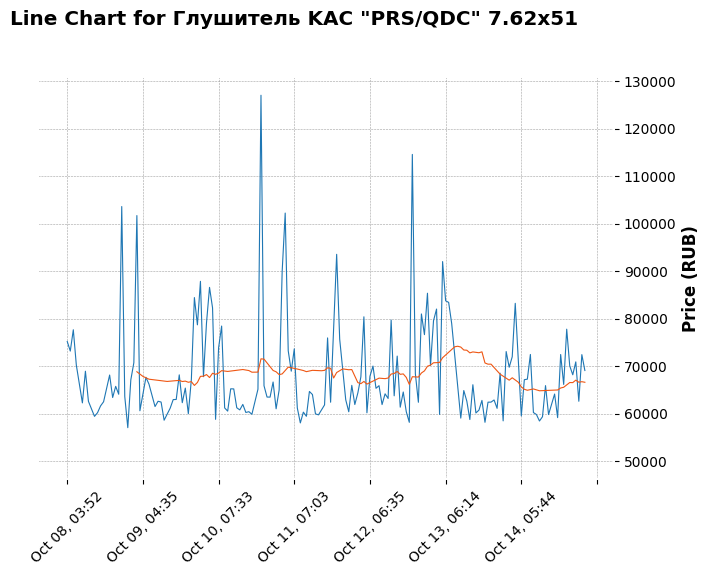

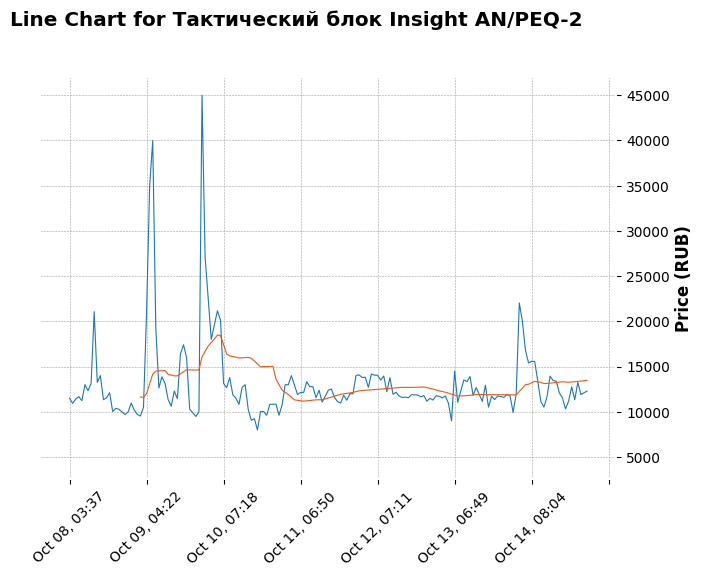

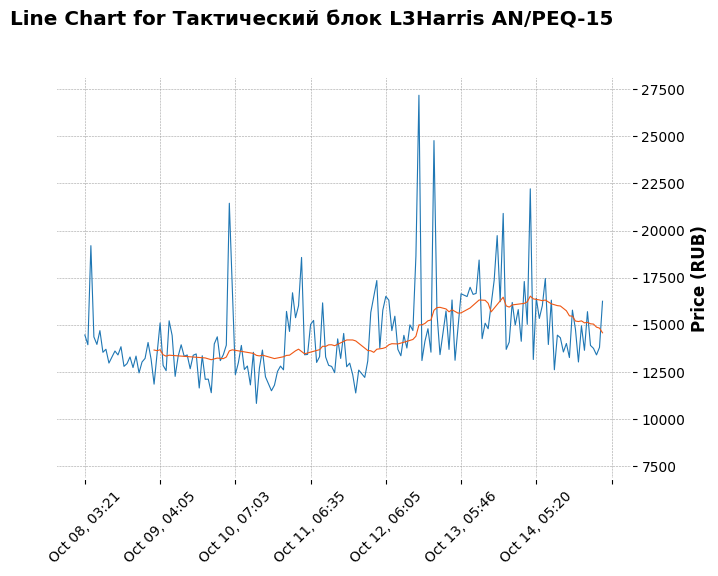

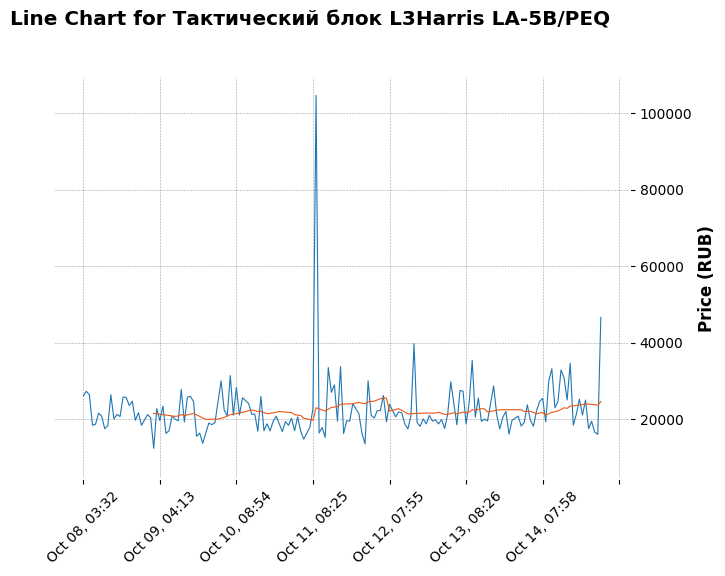

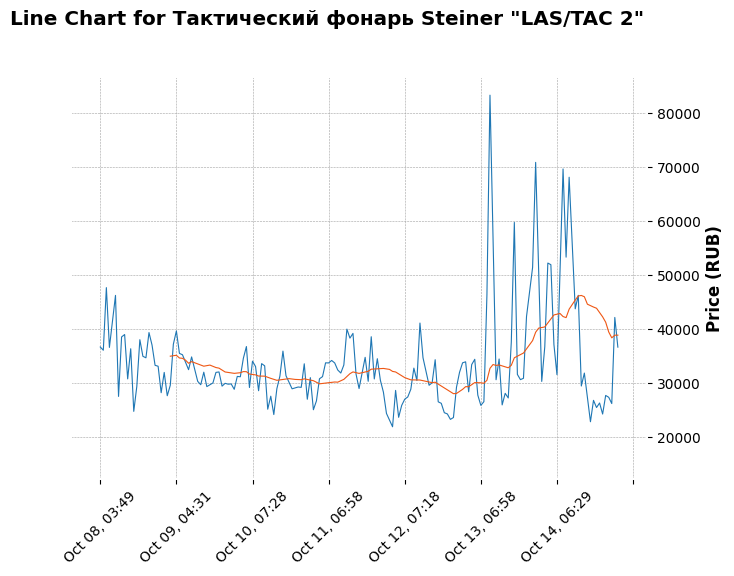

In [11]:
helper_functions.plot_all_finance(data_descrip=all_item_info_df_selected, data_prices=prices, directory="plots")

### Computing profitable resells

In [12]:
trader_offers = helper_functions.get_all_trader_stuff()
helper_functions.get_profitable_resells(trader_offers, directory="Trader_trades_current", use_current_price=True)
helper_functions.get_profitable_resells(trader_offers, directory="Trader_trades_avg", use_current_price=False)